# Polynomial Regression

In [54]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [10]:
poly = PolynomialFeatures(2) # 차수를 의미
poly.fit_transform(X) # x0, x1, x2, x1^2, x1x2, x2^2

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [12]:
poly = PolynomialFeatures(interaction_only = True)
poly.fit_transform(X)  # x0, x1, x2, x1x2

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

# Example

In [19]:
def f(size):
    x = np.linspace(0, 5, size) # index0 부터 index1까지의 숫자를 index2개 만큼 균등한 간격으로 뽑기
    y = x * np.sin(x ** 2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size)*0.5
    
    return (x,y)

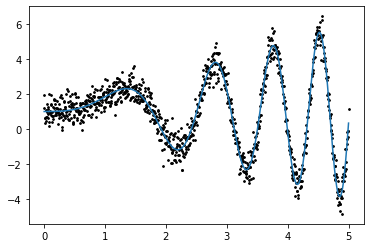

In [20]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s=3, c="black")
plt.show()

In [28]:
X.shape, y.shape

((1000,), (1000,))

In [34]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape   #벡터화 시키기

((1000, 1), (1000, 1))

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

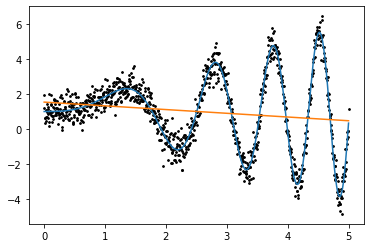

In [39]:
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X).flatten())         # flatten() 벡터화의 역연산
plt.show()

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [42]:
lr = LinearRegression(fit_intercept = False)  # 위에서 이미 절편이 생성됐으므로
lr.fit(X_poly,y) 

LinearRegression(fit_intercept=False)

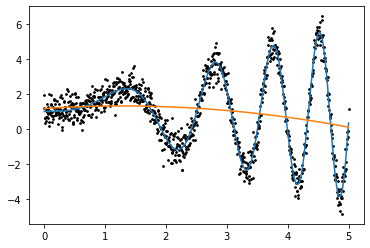

In [43]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [59]:
poly_features = PolynomialFeatures(degree=9)
X_poly = poly_features.fit_transform(X)

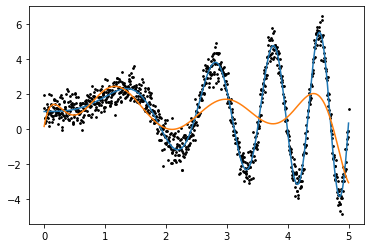

In [60]:
lr = LinearRegression()
lr.fit(X_poly,y)

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

# How to optimize

- 모델 피팅을 위해 무슨 값을 최소화 시켜야할 것인가? 
- 실험적으로 degree(차수), learning rate 초기값과 변화방법, iteration(레시피 라고 부름) 등등 조정하면서 다 해보자 -> Hyper parameter search
- 우리가 하면 오래 걸려서 남들이 최적화 시켜놓은거 가져오는 것도 좋은 방법.

- 우리가 사용할 방법
1. RMSE의 최소값을 찾자
2. Ridge, Lasso, LR 모두 다 써보자
3. Degree 를 10~ 50까지 써보자
4. 결과를 한눈에 정리해보기!

In [47]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [49]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression(fit_intercept = False)
    lr.fit(X_poly,y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso(fit_intercept = False)
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge(fit_intercept = False)
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

C:\Users\1004\anaconda3\envs\human\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2405.1139613110254, tolerance: 0.5484192105314357
  model = cd_fast.enet_coordinate_descent(
C:\Users\1004\anaconda3\envs\human\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2412.002665257188, tolerance: 0.5484192105314357
  model = cd_fast.enet_coordinate_descent(
C:\Users\1004\anaconda3\envs\human\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.85542e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\1004\anaconda3\envs\human\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want

C:\Users\1004\anaconda3\envs\human\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2351.416953432739, tolerance: 0.5484192105314357
  model = cd_fast.enet_coordinate_descent(
C:\Users\1004\anaconda3\envs\human\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2344.010942711077, tolerance: 0.5484192105314357
  model = cd_fast.enet_coordinate_descent(
C:\Users\1004\anaconda3\envs\human\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2336.145499770784, tolerance: 0.5484192105314357
  model = cd_fast.enet_coordinate_descent(
C:\Users\1004\anaconda3\envs\human\lib\site-packages\sklearn\linear_model\_c

In [53]:
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, 
        "lasso_rmse":rmse_lasso_list,"ridge_rmse":rmse_ridge_list}
df = DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.904220,2.298555,1.931149
11,1.897258,2.299568,1.910094
12,1.640814,2.299609,1.908657
13,1.359361,2.298900,1.883028
14,1.346313,2.297620,1.683925
15,0.929830,2.296172,1.494411
16,0.729364,2.294818,1.501801
17,0.700948,2.293700,1.311667
18,0.725447,2.292866,0.899950


In [55]:
df.min()

lr_rmse       0.574527
lasso_rmse    2.291947
ridge_rmse    0.526974
dtype: float64

In [58]:
df["ridge_rmse"].sort_values().head()

poly_range
23    0.526974
22    0.532053
21    0.623579
24    0.670401
20    0.768115
Name: ridge_rmse, dtype: float64

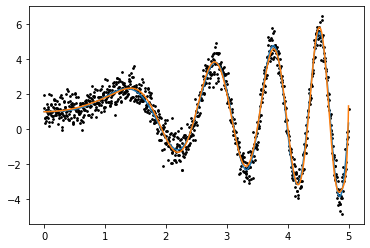

In [65]:
poly_features = PolynomialFeatures(degree=23)
X_poly = poly_features.fit_transform(X)

ridge = Ridge()
ridge.fit(X_poly,y)

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X, ridge.predict(X_poly))
plt.show()

# 언제쓰나?

- 한개 변수가 Y값과 비선형적인 관계가 있다고 의심
- 주기적인 패턴을 보이는 Series 데이터
- 모델 자체가 복잡해지면 해결가능한 부분이 많음 -> SVM, Tree-based models

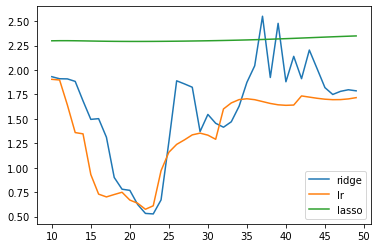

In [67]:
plt.plot(poly_range, df["ridge_rmse"], label="ridge")
plt.plot(poly_range, df["lr_rmse"], label="lr")
plt.plot(poly_range, df["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

# lasso 의 sparse한 특성 때문에 필요없다고 판단된 파라미터들이 제거되면서 변동을 크게 보이지 않음
# r

# Exercises problem